<a href="https://colab.research.google.com/github/anujdutt9/PyTorch-DeepLearning/blob/master/DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
from sklearn.datasets import make_circles
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# Generate a Dataset
num_pts = 500
centers = [[-0.5, 0.5], [0.5, -0.5]]
X,y = make_circles(n_samples=num_pts, noise=0.1, factor=0.2 ,random_state=101)

In [3]:
X

array([[ 9.60641203e-01,  4.33802336e-01],
       [-3.03387161e-01,  1.31380987e-01],
       [-7.75144738e-01,  4.35387452e-01],
       [ 1.06638622e+00,  1.12103768e-01],
       [-6.89593558e-01, -7.38884328e-01],
       [-5.97416301e-02,  2.89689479e-01],
       [ 6.85235516e-01,  7.55258263e-01],
       [ 5.95665067e-01, -8.12344255e-01],
       [-4.42856701e-01,  9.66259641e-01],
       [-1.70065822e-02, -1.69119771e-01],
       [ 1.29007675e-01, -1.64788557e-01],
       [ 1.64194030e-01, -1.69745805e-01],
       [-9.44829882e-01,  7.21430882e-01],
       [-2.23357597e-02,  1.26716798e-01],
       [ 3.82335563e-02,  1.09421510e+00],
       [ 5.81665170e-01,  9.39271715e-01],
       [-1.27972291e-01, -7.86396035e-02],
       [ 1.05396080e+00, -4.16851386e-01],
       [-7.83722798e-02,  4.00999968e-01],
       [-6.93732152e-02, -2.30347949e-01],
       [ 8.33307601e-01,  2.40050259e-01],
       [ 5.87497525e-01, -8.97247166e-01],
       [ 2.52411157e-01,  1.89280094e-01],
       [ 9.

In [4]:
y

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,

In [0]:
# Convert from Numpy to Torch Tensor
X_data = torch.tensor(X)
y_data = torch.tensor(y.reshape(500,1))

In [0]:
# Function to make a Scatter plot of Dataset
def scatter_plot():
  # Plot all values of X where y == 0 in 1st and 2nd Column of X
  plt.scatter(X[y==0, 0], X[y==0, 1])

  # Plot all values of X where y == 1 in 1st and 2nd Column of X
  plt.scatter(X[y==1, 0], X[y==1, 1])

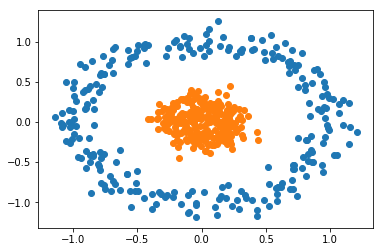

In [7]:
scatter_plot()

In [0]:
class NN(nn.Module):
  
  # Constructor
  def __init__(self, input_size, hidden_size, output_size):
    super().__init__()
    self.linear1 = nn.Linear(in_features=input_size, out_features=hidden_size)
    self.linear2 = nn.Linear(in_features=hidden_size, out_features=output_size)
  
  # Forward Pass
  def forward(self, x):
    x = torch.sigmoid(self.linear1(x))
    x = torch.sigmoid(self.linear2(x))
    return x
  
  # Predict Function
  def predict(self, x):
    pred = self.forward(x)
    if pred > 0.5:
      return 1
    else:
      return 0

In [9]:
torch.manual_seed(2)

In [0]:
# Initialize Model
model = NN(input_size=2, hidden_size=4, output_size=1)

In [11]:
model

NN(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)

In [12]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.1622, -0.1683],
         [ 0.1939, -0.0361],
         [ 0.3021,  0.1683],
         [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
 tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
 tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
 tensor([0.2116], requires_grad=True)]

In [0]:
# Loss Criterion
criterion = nn.BCELoss()

In [0]:
# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [0]:
# Epochs
epochs = 1000

In [16]:
losses = []

for e in range(epochs):
  y_pred = model.forward(X_data.type(torch.FloatTensor))
  
  loss = criterion(y_pred, y_data.type(torch.FloatTensor))
  
  print('epoch: {}'.format(e),
       'loss: {}'.format(loss))
  
  
  losses.append(loss)
  
  optimizer.zero_grad()
  
  loss.backward()
  
  optimizer.step()

epoch: 0 loss: 0.7148709893226624
epoch: 1 loss: 0.6947733759880066
epoch: 2 loss: 0.6955791711807251
epoch: 3 loss: 0.7015529870986938
epoch: 4 loss: 0.7014743685722351
epoch: 5 loss: 0.6975812911987305
epoch: 6 loss: 0.6940743923187256
epoch: 7 loss: 0.6930428743362427
epoch: 8 loss: 0.694172739982605
epoch: 9 loss: 0.695772647857666
epoch: 10 loss: 0.6963683366775513
epoch: 11 loss: 0.6956222653388977
epoch: 12 loss: 0.6941139101982117
epoch: 13 loss: 0.6926773190498352
epoch: 14 loss: 0.6918594837188721
epoch: 15 loss: 0.6916961669921875
epoch: 16 loss: 0.6917821168899536
epoch: 17 loss: 0.6915754675865173
epoch: 18 loss: 0.6907268762588501
epoch: 19 loss: 0.6892212629318237
epoch: 20 loss: 0.6872692108154297
epoch: 21 loss: 0.6851246953010559
epoch: 22 loss: 0.682919442653656
epoch: 23 loss: 0.6806067824363708
epoch: 24 loss: 0.6780029535293579
epoch: 25 loss: 0.674887478351593
epoch: 26 loss: 0.6711087226867676
epoch: 27 loss: 0.6666319370269775
epoch: 28 loss: 0.6615070104598999

Text(0, 0.5, 'Loss')

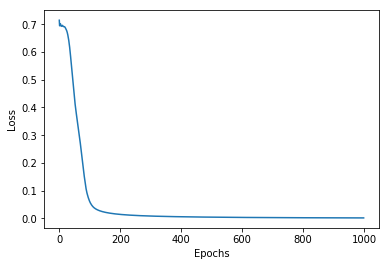

In [17]:
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [0]:
# Function to Plot Decision Boundary
def plot_decision_boundary(X, y):
  # Linearly spaced values between X min and X max values per column for X and Y axis
  x_span = np.linspace(min(X[:, 0]) - 0.25, max(X[:, 0]) + 0.25)
  y_span = np.linspace(min(X[:, 1]) - 0.25, max(X[:, 1]) + 0.25)
  # Returns a len(x_span) by len(x_span) matrix by copying values over
  xx, yy = np.meshgrid(x_span, y_span)
  # Flattening out arrays
  grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()])
  # Make Predictions
  pred = model.forward(grid.type(torch.FloatTensor))
  z = pred.view(xx.shape).detach().numpy()
  # Create Contour Plot
  plt.contourf(xx, yy, z)

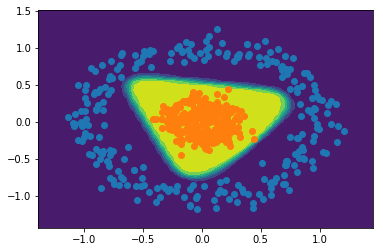

In [19]:
# Scatter Plot with Decision Boundary
plot_decision_boundary(X, y)
scatter_plot()

Predicted Label: 1


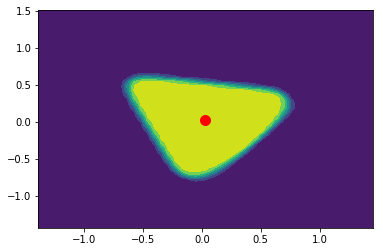

In [20]:
x = 0.025
y = 0.025
point = torch.tensor([x, y])
pred = model.predict(point)
plt.plot([x], [y], 'o', markersize=10, color='red')
print('Predicted Label: {}'.format(pred))
plot_decision_boundary(X, y)